# Dealing with Outliers in House Prices Data

In this notebook, I will use a house price data set to deal with outliers. In particular, I will...
- Create boxplots
- Identify the type and volume of skewness in the data.
- Handle outliers in the data set to make the data symmetrical
Todays dataset can be found here: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
#Check for duplicate values
duplicates = df.duplicated().sum()
print(duplicates)

#Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print(missing)

0
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


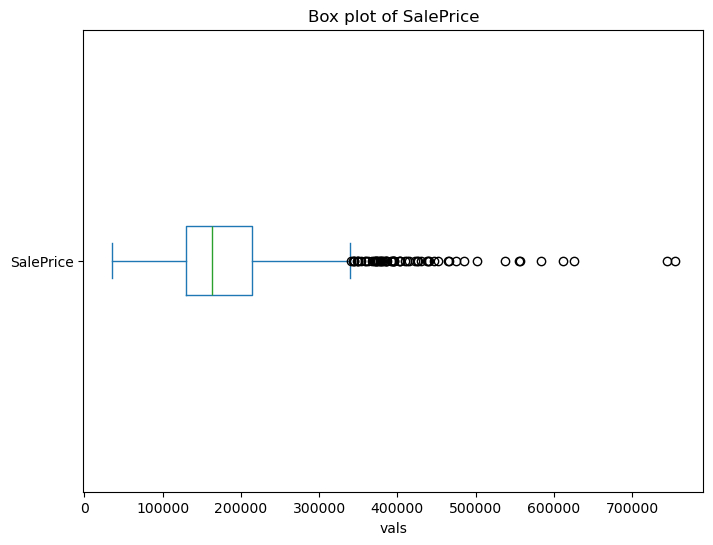

In [29]:
# Making a box plot of Sale Price
plt.figure(figsize=(8,6))
df['SalePrice'].plot(kind='box', vert=False)
plt.title('Box plot of SalePrice')
plt.xlabel('vals')
plt.show()

From this Box plot on Sale price, we can infer a few things...
- The box covers the middle 50% range, with the bottom being the 25%, the top being the 75%, and the green line being the median.
- The box plot is likely right-skewed because the whiskers to the right is longer than the whiskers to the left. But to be sure, we must calculate this.
- Their are a lot of dots to the right that are past these whiskers. These are considered outliers.

To further explain what the whiskers represent...
- They are calculated by multiplying the IQR (difference between Q3 and Q1) by 1.5, and then adding/subtracting it from Q3 and Q1
- if Q1 = 1000, and Q3 = 2000, then IQR = 1000. To calculate the upper whisker, do Q3 + 1.5 * IQR. To calculate the lower whisker, do Q1 - 1.5 * IQR
- If their is data lower than the low whisker, or higher than the high whisker, we can consider them as outliers.

In [34]:
# Right-skewed means that the data is clustered mostly on the left 
# Left-skewed means that the data is clustered mostly on the right
# We can determine if the box plot is right or left-skewed by comparing the mean and median.
# If mean > median, then the distribution is right-skewed
# If mean < median, then the distribution is left-skewed
print(df['SalePrice'].mean())

print(df['SalePrice'].median())



180921.19589041095
163000.0


In [24]:
# Here we can use the following code to get a skewness value
# If skewness > 0, then right-skewed, if skewness < 0, then left-skewed.
# 0 - 0.5 means fairly symmetrical, 0.5 - 1, means moderately skewed, and above 1 means highly skewed.
skew_vals = df[numeric_cols].skew().sort_values(ascending=False)
print("Skewness:\n", skew_vals)

Skewness:
 SalePrice    1.882876
dtype: float64


In this case, we got a skewness value of 1.88. This means that these outliers on the right side of our data are lifting the mean higher than the median. We want our data to be more symmetrical because it facilitates statistical analysis and machine learning models. Many statistical models assume normality, and reducing the influence of outliers will help improve model performance.

When dealing with right-skewed data, one common transformation to implement is log transform. This transformation compresses large values (outliers), much more than small ones, and works well if skewness is higher than 1 like our in this case.

In [35]:
# Creating a new column with SalePrice after the log transformation
df['SalePrice_log'] = np.log1p(df['SalePrice'])


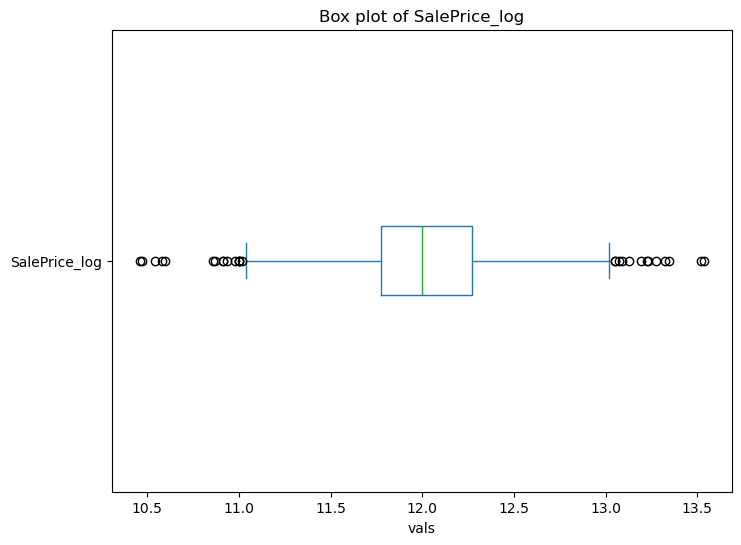

In [38]:
plt.figure(figsize=(8,6))
df['SalePrice_log'].plot(kind='box', vert=False)
plt.title('Box plot of SalePrice_log')
plt.xlabel('vals')
plt.show()

In [40]:
# Finding the skewness value of the transformed column.
skew_value = df['SalePrice_log'].skew()
print("Skewness:", skew_value)

Skewness: 0.12134661989685333


In [41]:
original_skew = df['SalePrice'].skew()
transformed_skew = df['SalePrice_log'].skew()

print(f"Original Skewness: {original_skew}")
print(f"Transformed Skewness: {transformed_skew}")


Original Skewness: 1.8828757597682129
Transformed Skewness: 0.12134661989685333


Now we can see that the skewness is 0.12. This means that the data is basically symetrical. This balanced distribution is better suited for statistical analysis and predictive modeling.

In [1]:
df.info()

NameError: name 'df' is not defined